# Insurance Premium Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* The goal of this project is to give people an estimate of how much health risk they have based on their individual health situation. 
* After that Customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our model in mind. 
* This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part. 

## 2) Data Collection.
* The Dataset is collected from scrapping from kaggle webiste
* The data consists of 7 columns and 1338 rows.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from urllib import request 

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [10]:
data_url ="https://raw.githubusercontent.com/JunaidARahat/MyTutorials/main/insurance.csv"

df =pd.read_csv(data_url)

**Show Top 5 Records**

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Shape of the dataset**

In [12]:
df.shape

(1338, 7)

**Summary of the dataset**

In [13]:
# Display summary statistics for a dataframe
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Check Datatypes in the dataset**

In [14]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 3. EXPLORING DATA

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


### Feature Information
* **age**: Age of the customer in years
* **bmi**: Body mass index of the customers
* **children**: Count of children of the customers
* **sex**: Gender of the customer
* **smoker**: Is the customer smoker or not?
* **region**: Customer's region.

In [16]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

male      50.523169
female    49.476831
Name: sex, dtype: float64
---------------------------
no     79.521674
yes    20.478326
Name: smoker, dtype: float64
---------------------------
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64
---------------------------


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

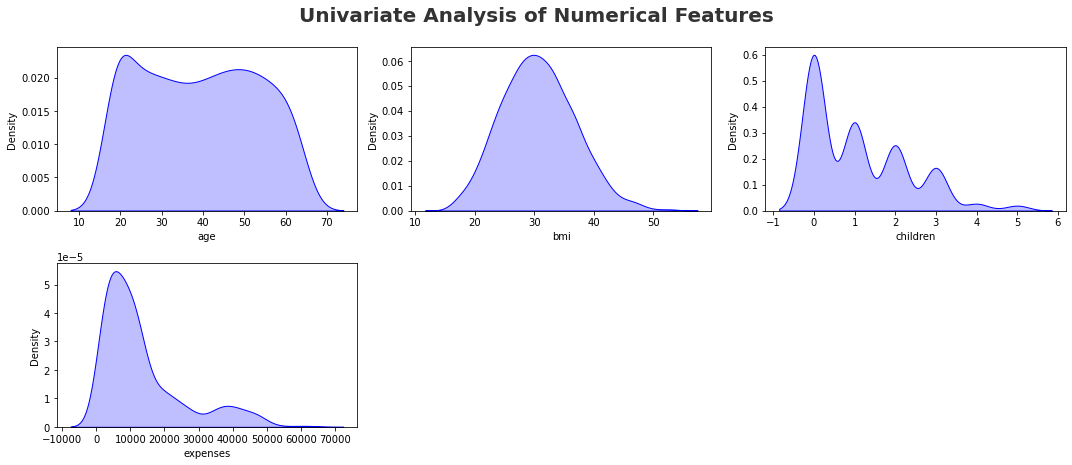

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')

**Report**
* `expenses` and `children` are slightly postively skewed.

### Categorical Features

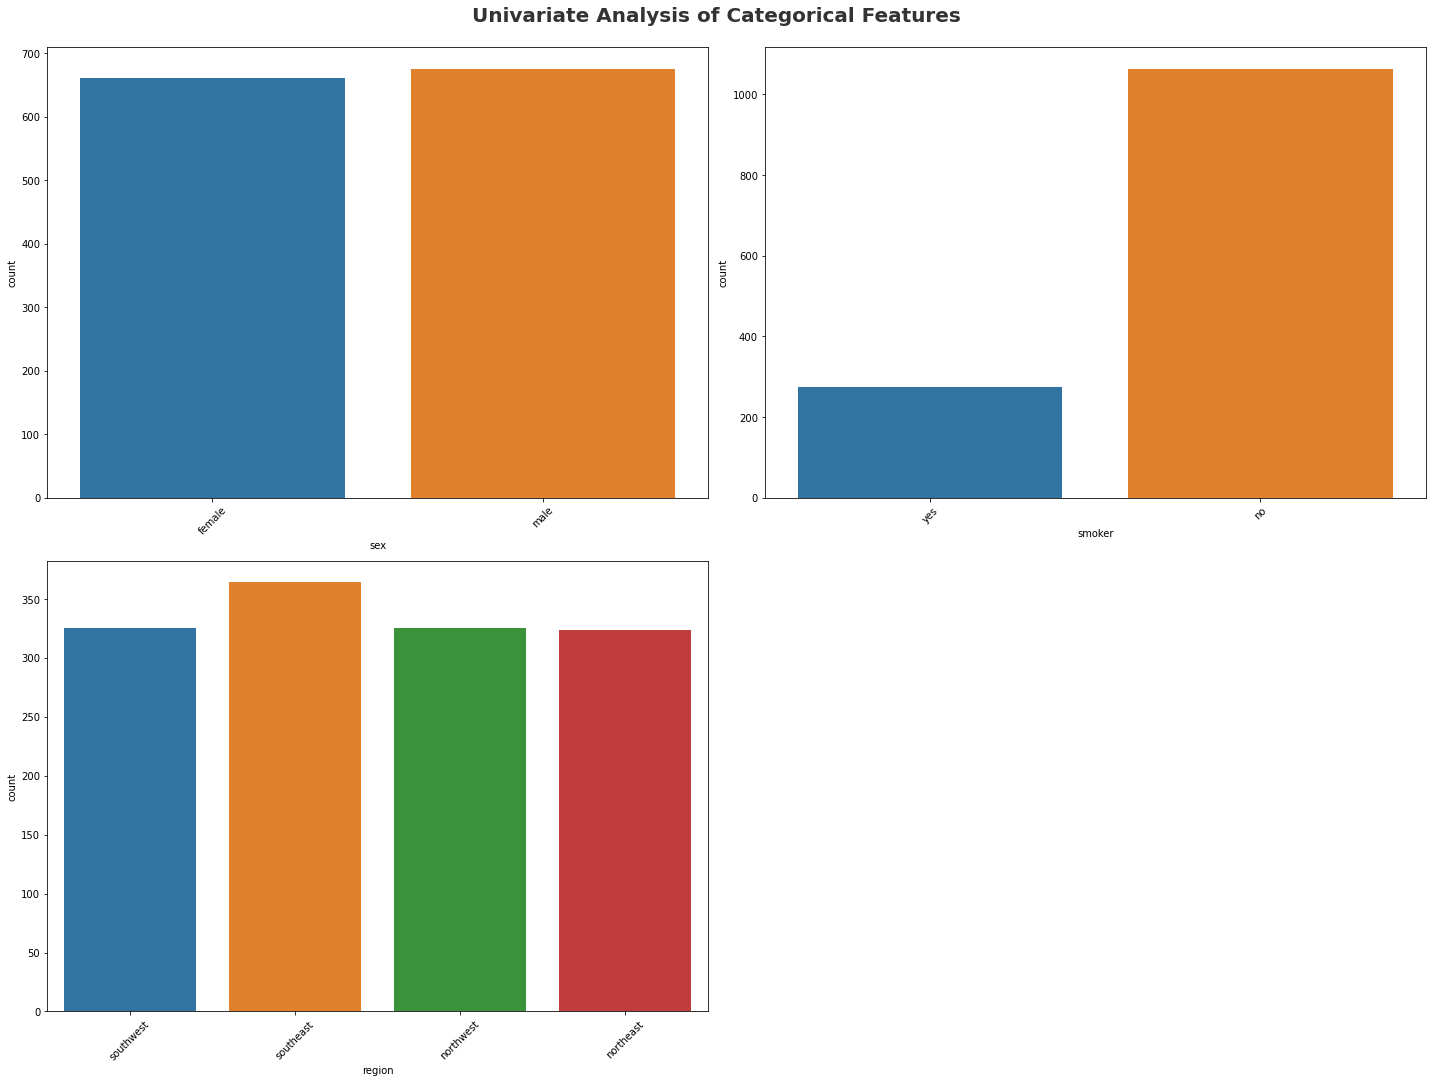

In [21]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Cat.png')

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [22]:
df[(list(df.columns)[1:])].corr()

,bmi,children,expenses
bmi,1.000000,0.012645,0.198576
children,0.012645,1.000000,0.067998
expenses,0.198576,0.067998,1.000000


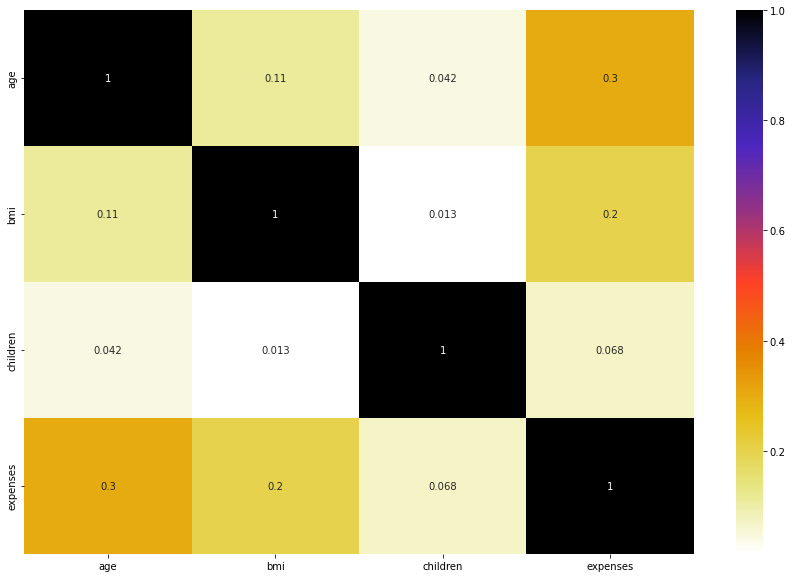

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Report** 
* No Multicolinnearity found in the dataset

### Checking Null Values

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [29]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'bmi', 'expenses']


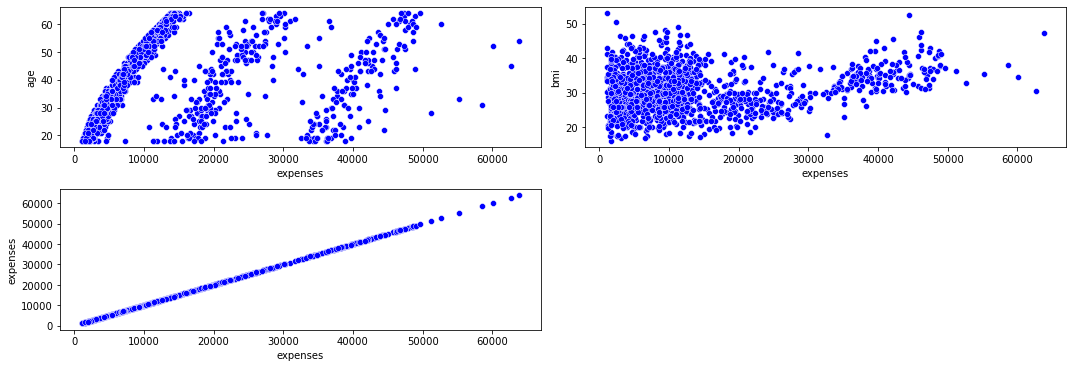

In [34]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='expenses', y=continuous_features[i], color='b')
    plt.tight_layout()

## 4. Visualization

### 4.1 Visualize the Target Feature

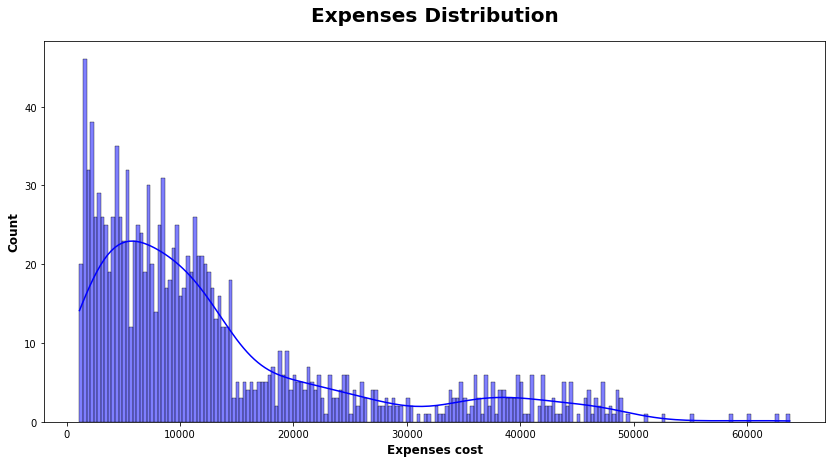

In [36]:
plt.subplots(figsize=(14,7))
sns.histplot(df.expenses, bins=200, kde=True, color = 'b')
plt.title("Expenses Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Expenses cost", weight="bold", fontsize=12)
plt.show()